In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

In [58]:
df = pd.read_csv('../datasets/breast_cancer_wisconsin.csv')
df.set_index('id', inplace=True)
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760         0.30010   
842517            0.08474           0.07864         0.08690   
84300903          0.10960           0.15990         0.19740   
84348301          0.14250           0.28390         0.24140   
84358402          0.10030           0.13280         0.19800   
...                   ...               ...             ...   
926424            0.11100           0.11590         0.24390   
926682            0.09780           0.10340         0.14400   
926954            0.08455           0.10230         0.09251   
927241            0.11780           0.27700         0.35140   
92751             0.05263           0.04362         0.00000   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
842302                0.14710         0.2419  ...        25.380   
842517                0.07017         0.1812  ...        24.990   
84300903              0.12790         0.2069  ...        23.570   
84348301              0.10520         0.2597  ...        14.910   
84358402              0.10430         0.1809  ...        22.540   
...                       ...            ...  ...           ...   
926424                0.13890         0.1726  ...        25.450   
926682                0.09791         0.1752  ...        23.690   
926954                0.05302         0.1590  ...        18.980   
927241                0.15200         0.2397  ...        25.740   
92751                 0.00000         0.1587  ...         9.456   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0           0.16220   
842517            23.41           158.80      1956.0           0.12380   
84300903          25.53           152.50      1709.0           0.14440   
84348301          26.50            98.87       567.7           0.20980   
84358402          16.67           152.20      1575.0           0.13740   
...                 ...              ...         ...               ...   
926424            26.40           166.10      2027.0           0.14100   
926682            38.25           155.00      1731.0           0.11660   
926954            34.12           126.70      1124.0           0.11390   
927241            39.42           184.60      1821.0           0.16500   
92751             30.37            59.16       268.6           0.08996   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302              0.66560           0.7119                0.2654   
842517              0.18660           0.2416                0.1860   
84300903            0.42450           0.4504                0.2430   
84348301       

## Verificamos que não há dados faltantes

In [59]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 31 columns]

## Verificando se há _features_ correlacionadas

In [60]:
corr = df.corr()
corr

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

## Marcando _features_ que podem ser removidas

In [61]:
corr = corr.applymap(lambda x: True if (x != 1) and (x > 0.8) else False)
corr

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                    False         False            True       True   
texture_mean                   False         False           False      False   
perimeter_mean                  True         False           False       True   
area_mean                       True         False            True      False   
smoothness_mean                False         False           False      False   
compactness_mean               False         False           False      False   
concavity_mean                 False         False           False      False   
concave points_mean             True         False            True       True   
symmetry_mean                  False         False           False      False   
fractal_dimension_mean         False         False           False      False   
radius_se                      False         False           False      False   
texture_se                     False         False           False      False   
perimeter_se                   False         False           False      False   
area_se                        False         False           False       True   
smoothness_se                  False         False           False      False   
compactness_se                 False         False           False      False   
concavity_se                   False         False           False      False   
concave points_se              False         False           False      False   
symmetry_se                    False         False           False      False   
fractal_dimension_se           False         False           False      False   
radius_worst                    True         False            True       True   
texture_worst                  False          True           False      False   
perimeter_worst                 True         False            True       True   
area_worst                      True         False            True       True   
smoothness_worst               False         False           False      False   
compactness_worst              False         False           False      False   
concavity_worst                False         False           False      False   
concave points_worst           False         False           False      False   
symmetry_worst                 False         False           False      False   
fractal_dimension_worst        False         False           False      False   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                        False             False           False   
texture_mean                       False             False           False   
perimeter_mean                     False             False           False   
area_mean                          False             False           False   
smoothness_mean                    False             False           False   
compactness_mean                   False             False            True   
concavity_mean                     False              True           False   
concave points_mean                False              True            True   
symmetry_mean                      False             False           False   
fractal_dimension_mean             False             False           False   
radius_se                          False             False           False   
texture_se                         False             False           False   
perimeter_se                       False             False           False   
area_se                            False             False           False   
smoothness_se                      False             False           False   
compactness_se                     False             False           False   
concavity_se                       False             False           False   
concave points_se                  False             False           False   
symmetry_se                    

## Removendo _features_ que foram identificas como correlacionadas

In [62]:
keep = []
removed = []

for feat in corr:
    for column in corr[feat].index:
        if corr[feat][column] and column not in keep and column in df.columns:
            df.drop(column, axis=1, inplace=True)
            removed.append(column)

        keep.append(column)

removed

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst']

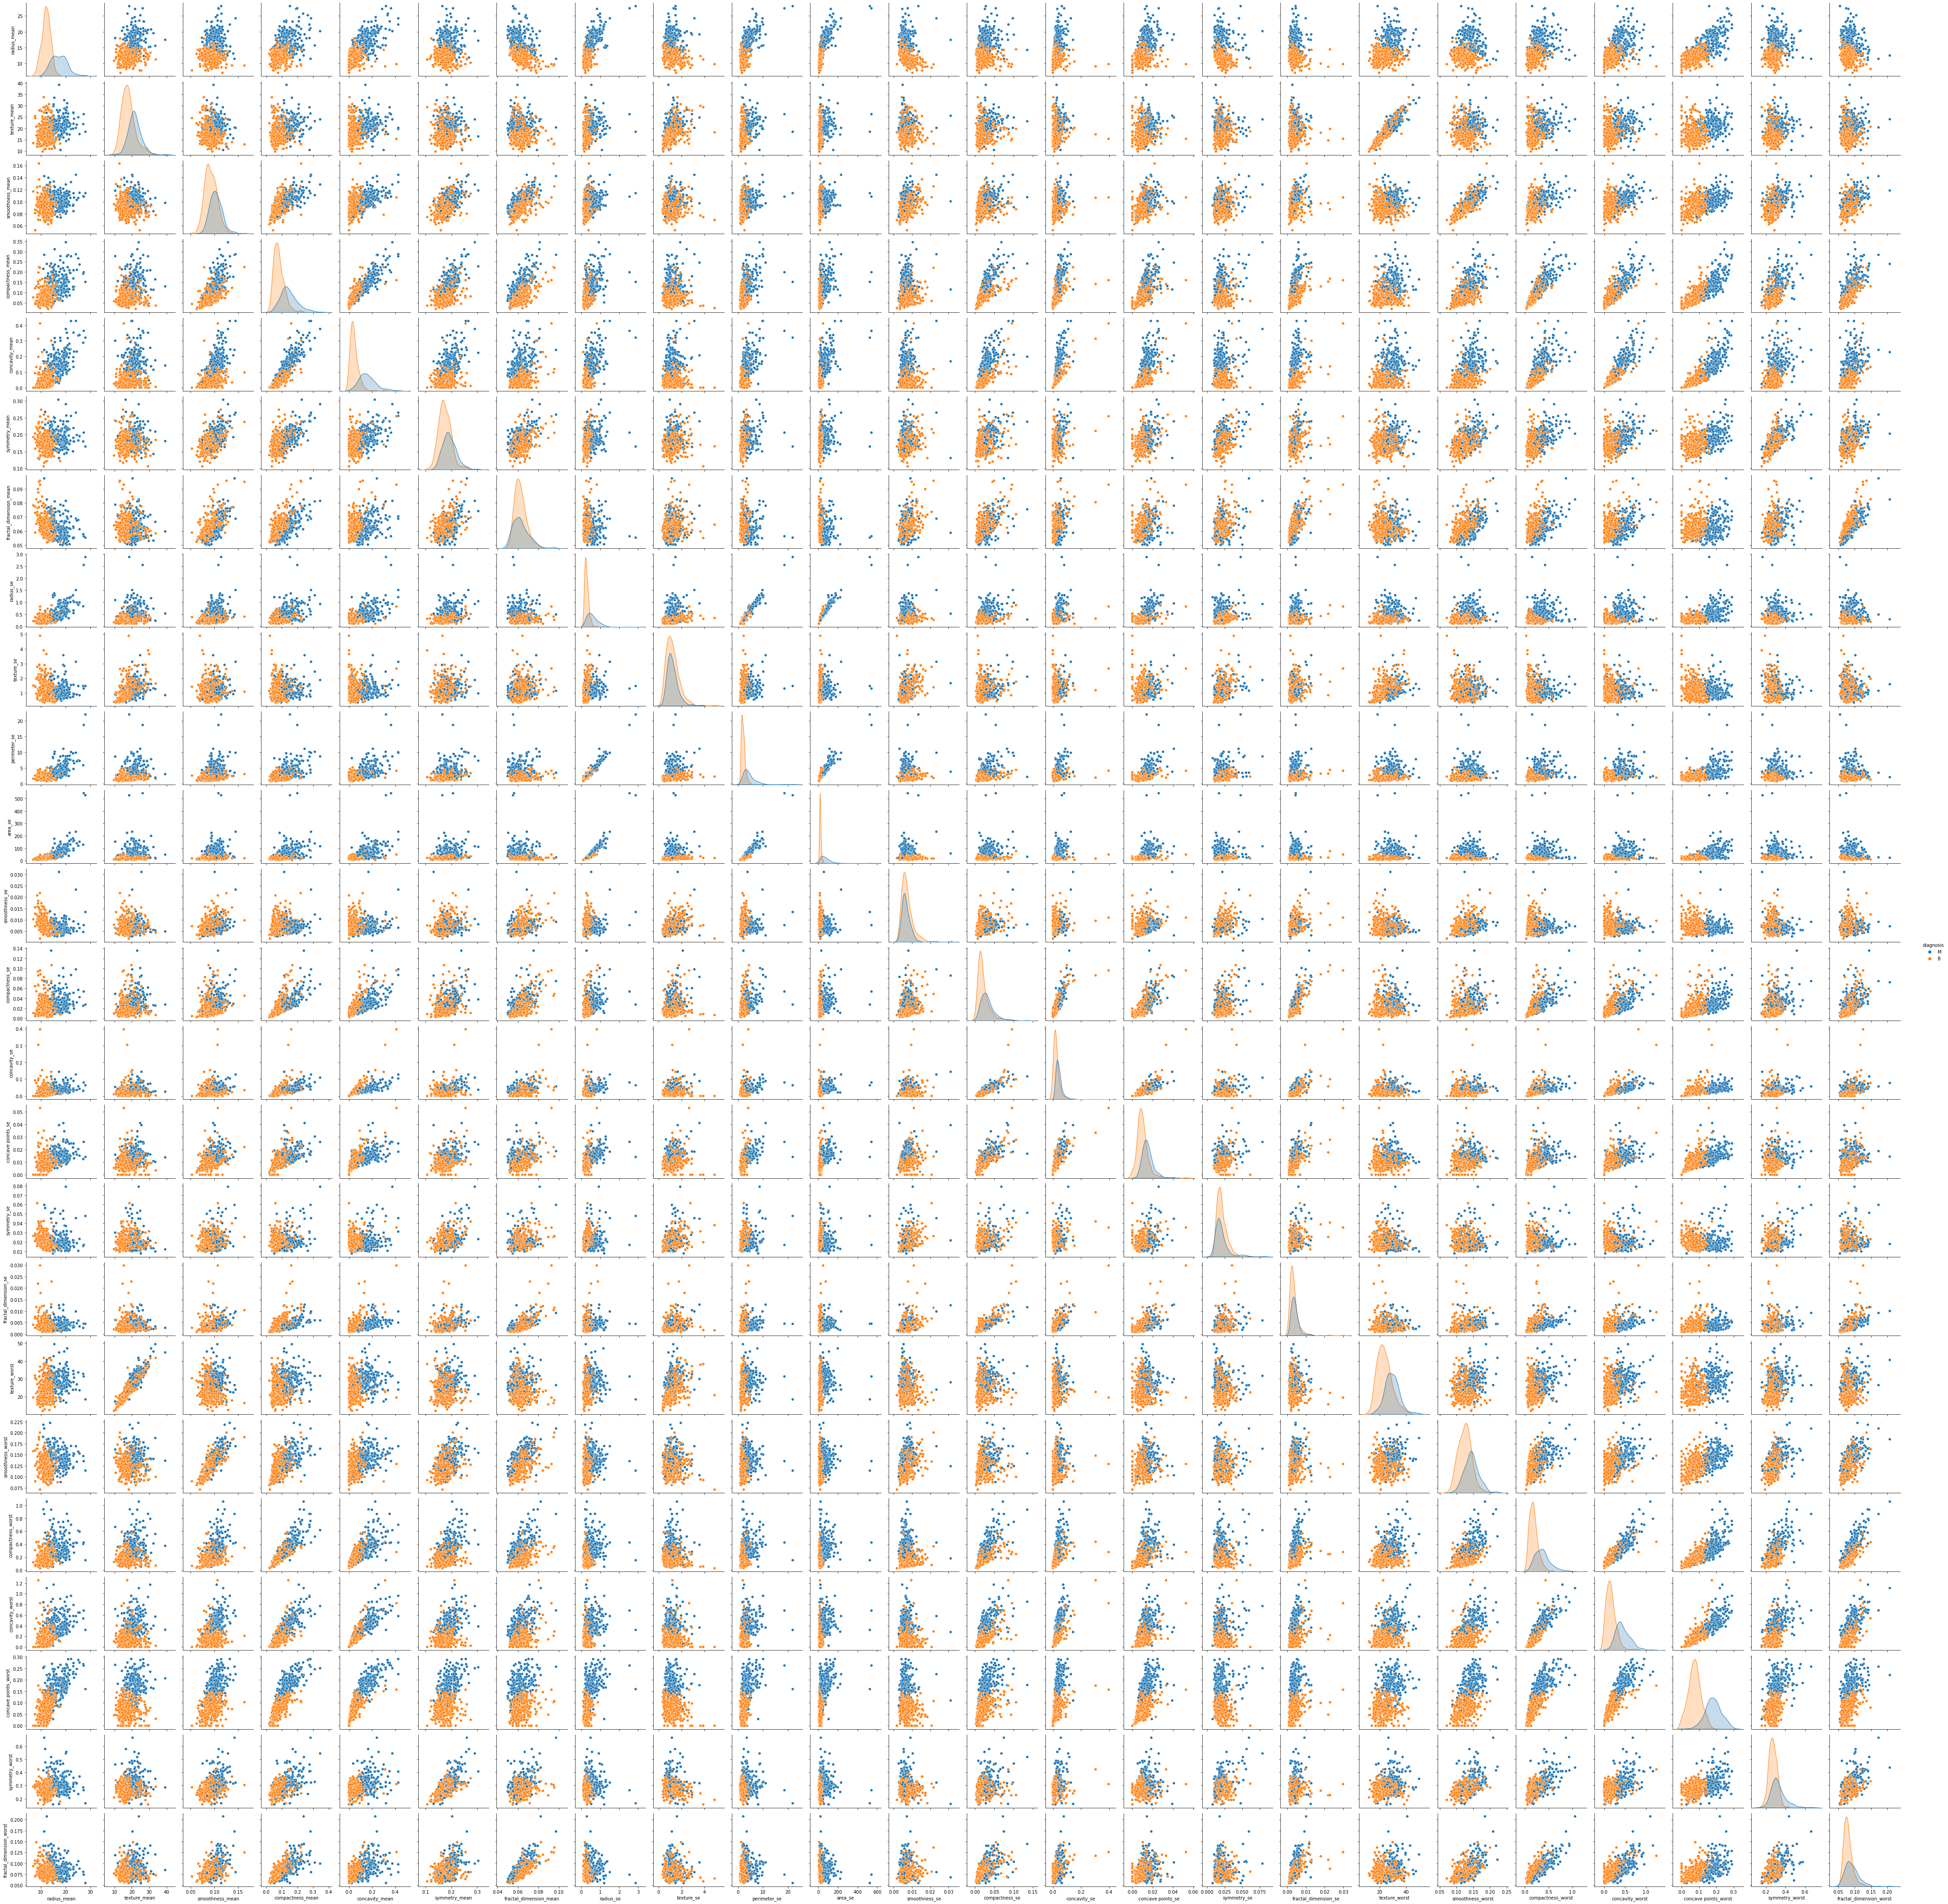

In [63]:
sns.pairplot(df, hue='diagnosis')

# Fazendo inferencias com base nos dados

Como os dados estão estão muito misturados nosso algoritmo convencional será pouco efetivo em rotular os dados. Mas a _feature_ concave_points_worst possui uma separação mais clara

$$
defineDiagnosis(concavePointsWorst)= 
\begin{cases}
    \text{maligno},& \text{se }  \leq 0.12 \\
    \text{benigno}, & \text{senão}
\end{cases}
$$